# Credit Risk Assessment: Baseline Logistic Regression Model

---

### Import Libraries and set Configurations

In [18]:
import numpy as np
import warnings
import pandas as pd
from pathlib import Path
from scipy import sparse
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (classification_report, confusion_matrix,roc_auc_score, accuracy_score, RocCurveDisplay)
import joblib
import matplotlib.pyplot as plt

data = Path("../../data/processed")
random_state=42
warnings.filterwarnings("ignore")

### Load Data

In [8]:
X_train = sparse.load_npz(data/"X_train.npz")
X_test = sparse.load_npz(data/"X_test.npz")
y_train = pd.read_csv(data/"y_train.csv").squeeze("columns")
y_test = pd.read_csv(data/"y_test.csv").squeeze("columns")
print("train", X_train.shape, " test", X_test.shape)
print("class balance:\n", y_train.value_counts(normalize=True).round(3))

train (1076248, 134)  test (269062, 134)
class balance:
 default
0    0.8
1    0.2
Name: proportion, dtype: float64


### Train Logistic Regression Model

In [9]:
logistic_regression = LogisticRegression(
    max_iter=500,
    solver="saga",
    random_state=random_state,
    n_jobs=1,
    class_weight="balanced"
)

logistic_regression.fit(X_train, y_train)
print("Model Fitted")

Model Fitted


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


### Evaluation Metics on Baseline Logistic Regression Model

              precision    recall  f1-score   support

           0       0.97      0.90      0.94    215350
           1       0.69      0.90      0.78     53712

    accuracy                           0.90    269062
   macro avg       0.83      0.90      0.86    269062
weighted avg       0.92      0.90      0.90    269062

AUC: 0.9554490284639612
Accuracy: 0.9003389553337149
Confusion Matrix:
 [[193950  21400]
 [  5415  48297]]


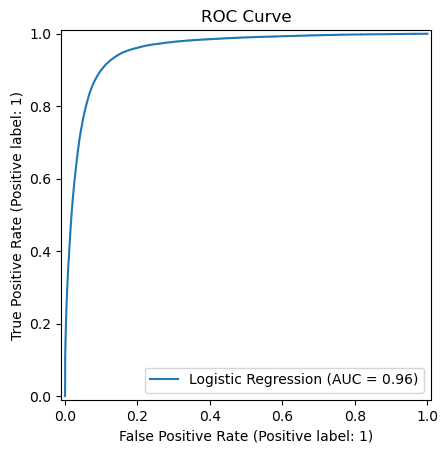

In [13]:
y_pred = logistic_regression.predict(X_test)
y_proba = logistic_regression.predict_proba(X_test)[:, 1]
print(classification_report(y_test, y_pred))
print("AUC:", roc_auc_score(y_test, y_proba))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

RocCurveDisplay.from_predictions(
    y_test, y_proba, name="Logistic Regression"
)
plt.title("ROC Curve")
plt.show()

### Save Model

In [15]:
models = Path("../../models"); models.mkdir(exist_ok=True)
joblib.dump(logistic_regression, models / "model_logreg.joblib")
print("model saved to", (models / "model_logreg.joblib").resolve())

model saved to /Users/pranavrao/Documents/ai-ml-projects/github-repos/aura-xai-finrisk-llm/models/model_logreg.joblib
